In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# import utilities and plotting
from argparse import Namespace
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
import os, sys 
sys.path.append(os.path.abspath("lib")) # N.B: NB needs this line to run locally!!

# make figures higher resolution (larger)
plt.rcParams['figure.dpi'] = 150
# A decent backend for animations
plt.rcParams["animation.html"] = "jshtml"
# let 'em get big
plt.rcParams["animation.embed_limit"] = 100  # MB

# import our code that we need
import fixed_center_of_mass_exact_2D as fcm
#import fixed_center_of_mass_exact_2D as fsm
from davidson import solve_davidson
from constants import *
from hamiltonian import solve_BO_surfaces
from plotting import plotpotential2D

# don't use too many cores
from threadpoolctl import ThreadpoolController
threadctl = ThreadpoolController()
threadctl.limit(limits=16)

[Build preconditioner naive] Elapsed time: 3.52us
[-0.05275162 -0.04275162 -0.03275162 -0.02275162 -0.01275162 -0.00275162
  0.00724838  0.01724838  0.02724838  0.03724838  0.04724838  0.05724838
  0.06724838  0.07724838  0.08724838  0.09724838]


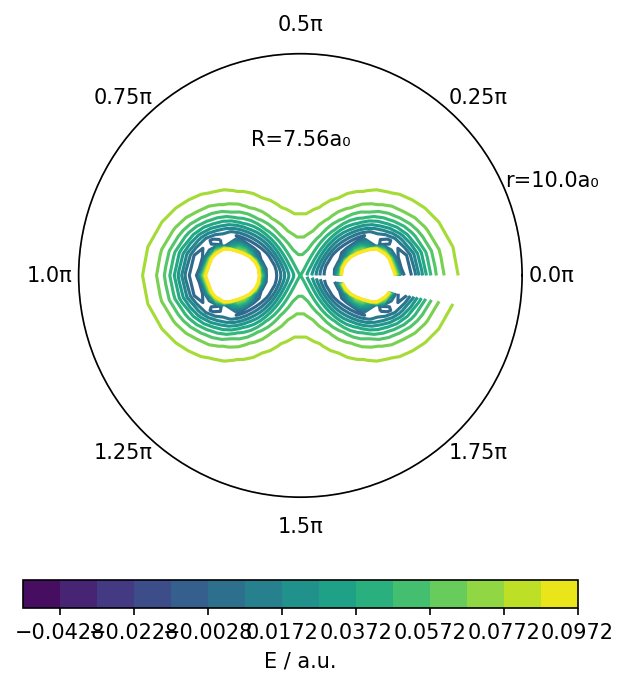

In [25]:
# set up the calculation
args = Namespace(
    M_1 = 1, M_2 = 1, J=0,
    g_1 = 1.0, g_2 = 1.0,
    NR = 51, Nr =32 , Ng = 34,
    #NR = 25, Nr = 200, Ng = 100,
    #extent = (2,4,5),   # defaults are (2,4,5), but they should be selected better (R_min, R_max, r_max)
    t = 16
)

# build the terms in the Hamiltonian
H = fcm.Hamiltonian(args)

levels = np.linspace(np.min(H.Vgrid), np.min(H.Vgrid) + 0.15, 16) # 0.15 a.u. ~4 eV range
print(levels)
display(plotpotential2D(H, levels))

Building BO spectrum
Mock call to tqdm({'total': 51, 'desc': 'Building electronic surfaces'})
Mock call to tqdm({'total': 1088, 'desc': 'Building vibrational states'})


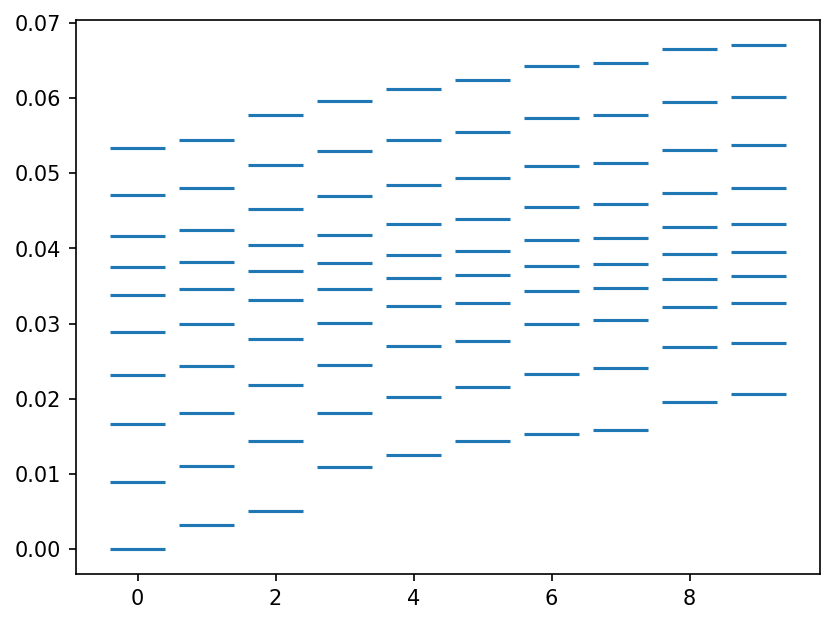

In [17]:
#B = np.load('../spec.npz')['bo_spectrum']*HARTREE_TO_EV
BO, BO_surf = H.BO_spectrum()
for n in range(10):
    plt.hlines(BO[:10,n] - BO[0,0], (n-0.4), (n+0.4))
    #plt.hlines(BOorig[:10,n] - BOorig[0,0], (n-0.4), (n+0.4), 'k')

(-0.0546333742682186, 0.01)

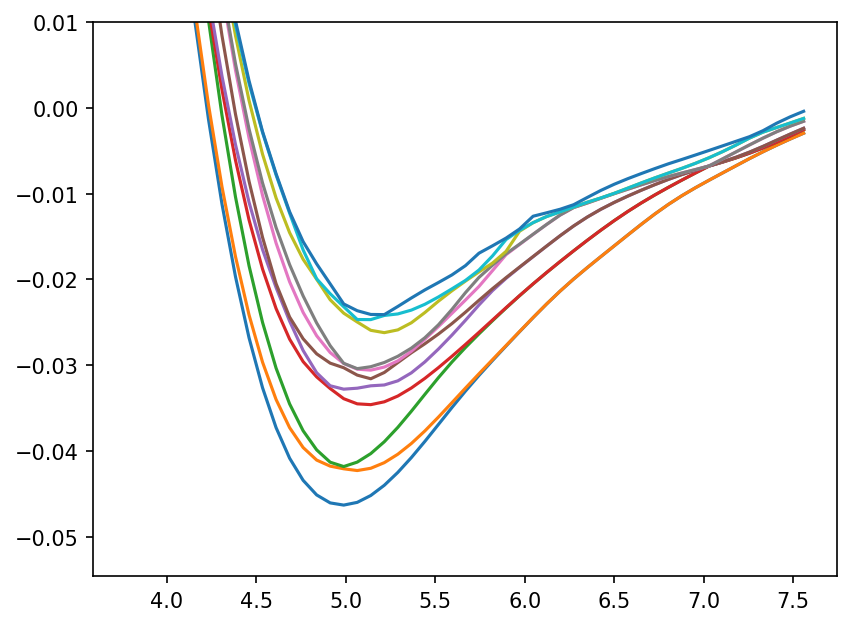

In [19]:
for i in range(11):
    plt.plot(H.R, BO_surf[:,i])

plt.ylim(top=0.01)

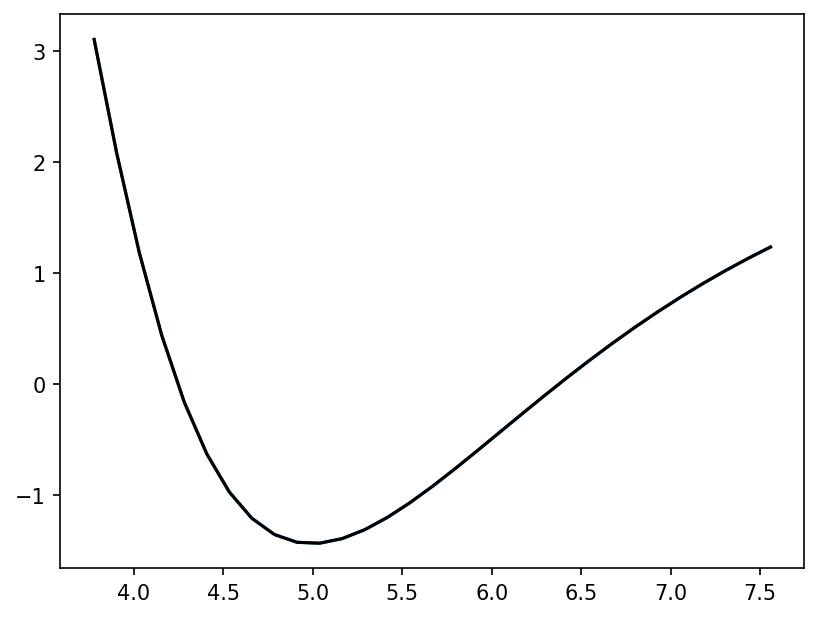

In [180]:
plt.plot(H.R,HARTREE_TO_EV*H.Vgrid[:,0,0])


In [48]:
idx=np.argmin(H.Vgrid[:,0,0])
np.gradient(np.gradient(H.Vgrid[:,0,0], H.R), H.R)[idx]

np.float64(-0.20469124309652975)

In [89]:
Vorig=np.copy(H.Vgrid[:,0,0])
BOorig = np.copy(BO)
BO_surforig = np.copy(BO_surf)

In [6]:
H @ np.random.random(H.size)

Array([ 0.10285287-1.00111030e-04j, -0.19113417+1.38513414e-04j,
        0.36584465+1.28918934e-04j, ...,  0.04568863-2.93963324e-06j,
        0.02665305+3.29382233e-05j,  0.09507038-1.51868092e-05j],      dtype=complex128)